In [1]:
import pandas as pd 
import numpy as np 
from textblob import TextBlob
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


import json, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import gensim

from sentiment_analysis_spanish import sentiment_analysis
import nltk
import pyLDAvis.gensim_models

import random
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
#df = pd.read_excel('Resultados Touchpoint APP Personas del 1abr al 24 May.xlsx')
#df = pd.read_excel('Touchpoint APP Personas 1 May al 8 Ago Prepago.xlsx')
df1 = pd.read_excel('Touchpoint APP Personas 1 May al 31Jul.xlsx')
df1 = df1.drop([0], axis=0)
df1.head(2)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q15 - Topic Sentiment Label,Q15 - Topic Sentiment Score,Q15 - Topics,Q20 - Parent Topics,Q20 - Sentiment Polarity,Q20 - Sentiment Score,Q20 - Sentiment,Q20 - Topic Sentiment Label,Q20 - Topic Sentiment Score,Q20 - Topics
1,2021-05-01 00:01:09,2021-05-01 00:02:59,IP Address,181.78.16.235,100,110,True,2021-05-01 00:02:59.714000,R_3ISGyOV01BzngPO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-30 00:08:19,2021-04-30 00:10:59,IP Address,191.156.153.227,38,160,False,2021-05-01 00:11:00.156000,R_22t2EpjmNZEoqFT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2 = pd.read_excel('Touchpoint APP Personas_ 1 al 31 ago completa.xlsx',sheet_name='SheetAjustado_2')
df2 = df2.drop([0], axis=0)
df2.head(2)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q15 - Topic Sentiment Label,Q15 - Topic Sentiment Score,Q15 - Topics,Q20 - Parent Topics,Q20 - Sentiment Polarity,Q20 - Sentiment Score,Q20 - Sentiment,Q20 - Topic Sentiment Label,Q20 - Topic Sentiment Score,Q20 - Topics
1,2021-08-01 00:02:16,2021-08-01 00:03:15,0,191.156.136.74,100,59,1,2021-08-01 00:03:16.244000,R_1IoVtduLafA89nU,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-01 00:03:40,2021-08-01 00:06:10,0,191.156.38.37,100,150,1,2021-08-01 00:06:11.288000,R_1EcfZSS3c60c0mV,NaN,...,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df=df1.append(df2)
df.reset_index(inplace=True)

In [5]:
len(df)

59097

In [6]:
df = df.drop([0], axis=0)

df.head(2)

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Q15 - Topic Sentiment Label,Q15 - Topic Sentiment Score,Q15 - Topics,Q20 - Parent Topics,Q20 - Sentiment Polarity,Q20 - Sentiment Score,Q20 - Sentiment,Q20 - Topic Sentiment Label,Q20 - Topic Sentiment Score,Q20 - Topics
1,2,2021-04-30 00:08:19,2021-04-30 00:10:59,IP Address,191.156.153.227,38,160,False,2021-05-01 00:11:00.156000,R_22t2EpjmNZEoqFT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2021-04-30 00:10:51,2021-04-30 00:11:03,IP Address,181.78.21.213,6,11,False,2021-05-01 00:11:04.303000,R_2y9PPrBZcRkKcoZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.Q2_NPS_GROUP.value_counts()

Promotor     30835
Detractor    11357
Pasivo        9876
Name: Q2_NPS_GROUP, dtype: int64

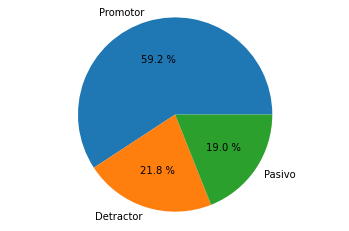

In [8]:
A = df.Q2_NPS_GROUP.value_counts()
indices = A.index
plt.pie(A, labels=indices, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

####  Funciones para Limpieza de texto

In [9]:
def limpiar_texto(texto):
    """
    Función para realizar la limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminamos comas y /
    texto = re.sub(r',', ' ', str(texto))
    texto = re.sub(r'/', ' ', str(texto))
    # Eliminado las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # remover \n
    #texto = re.sub(r'\n', '', texto)
    texto = texto.replace('\n', '')
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

In [10]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words("spanish"))
def filtrar_stopword_digitos(tokens):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """
    return [token for token in tokens if token not in STOPWORDS 
            and not token.isdigit()]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CristhianJohnatanIzq\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stemmer = SnowballStemmer("spanish")
def stem_palabras(tokens):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    return [stemmer.stem(token) for token in tokens]

In [12]:
def Limpiar_Caracter(texto):
    if len(texto) == 1 or texto == ',':
        texto = ''
    else:
        texto = texto
    return texto

###  Seleccion de Preguntas

In [13]:
Qs=['Q4','Q10','Q12','Q15','Q18','Q20']

###  Analisis de sentimientos

In [14]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

In [15]:
dfSent=df.fillna('')

In [16]:
tokenizer = ToktokTokenizer() 
Lista_general=[]
for column in Qs:
    dfSent["Tokens_"+column]=dfSent[column].apply(limpiar_texto)
    dfSent["Sent_"+column] =  np.where(dfSent["Tokens_"+column]!='', dfSent[column].apply(sentiment.sentiment)*2-1,'')
    
dfSent.head(2)

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Tokens_Q10,Sent_Q10,Tokens_Q12,Sent_Q12,Tokens_Q15,Sent_Q15,Tokens_Q18,Sent_Q18,Tokens_Q20,Sent_Q20
1,2,2021-04-30 00:08:19,2021-04-30 00:10:59,IP Address,191.156.153.227,38,160,False,2021-05-01 00:11:00.156,R_22t2EpjmNZEoqFT,...,,,,,,,,,,
2,3,2021-04-30 00:10:51,2021-04-30 00:11:03,IP Address,181.78.21.213,6,11,False,2021-05-01 00:11:04.303,R_2y9PPrBZcRkKcoZ,...,,,,,,,,,,


##### Fin Analisis de Sentimiento

####  Preprocesamiento

In [17]:
tokenizer = ToktokTokenizer() 
Lista_general=[]
dfc = dfSent[dfSent['Q2_NPS_GROUP']!='Promotor']
for column in Qs:    
    dfc["Tokens_"+column] = dfc["Tokens_"+column].apply(tokenizer.tokenize)
    dfc["Tokens_"+column] = dfc["Tokens_"+column].apply(filtrar_stopword_digitos)
    dfc["Tokens_"+column] = dfc["Tokens_"+column].apply(stem_palabras)
    #solo ciertas Qs son agregadas
    if column in ('Q4','Q10','Q12','Q15','Q18','Q20') :
        listAux = dfc["Tokens_"+column].tolist()
        listAux = [x for x in listAux if x!= []]
        #print("Qs")
        print(column, len(listAux))
        Lista_general = Lista_general+listAux

Q4 4175
Q10 1071
Q12 2778
Q15 7450
Q18 6503
Q20 1366


###  Modelo de Tópicos

In [18]:
### Funciones para modelo de tópicos
def make_bigrams(texts,bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts,bigram_mod,trigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def impresionTopicos(mod,nPalabras,nTopicos):
    topicos = mod.print_topics(num_words=nPalabras, num_topics=nTopicos)
    for topico in topicos:
        print(topico)    
        
def impresionTopicosLimp(mod,nPalabras,nTopicos):
    #Impresion limpia de Tópicos
    topicos = mod.print_topics(num_words=nPalabras, num_topics=nTopicos)
    i=0
    for topico in topicos:
        i=i+1
        textoAux = re.sub(r'\W', ' ', str(topico))
        textoAux = re.sub(r'\s+[a-zA-Z]\s+', ' ', textoAux)
        textoAux = re.sub(r'[0-9]', ' ', textoAux)
        textoAux = re.sub(r'\s+', ' ', textoAux, flags=re.I)
        print(str(i),textoAux)

In [19]:
bigram = gensim.models.Phrases(Lista_general, min_count=5, threshold=10) 
trigram = gensim.models.Phrases(bigram[Lista_general], threshold=10)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

data_words_bigrams = make_bigrams(Lista_general,bigram_mod)

diccionario = Dictionary(data_words_bigrams)
print(f'Número de tokens: {len(diccionario)}')

diccionario.filter_extremes(no_below=2, no_above = 0.9)
print(f'Número de tokens: {len(diccionario)}')

corpus = [diccionario.doc2bow(noticia) for noticia in data_words_bigrams]

Número de tokens: 5686
Número de tokens: 2656


In [20]:
numeroTopicos=5

In [21]:
lda = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=numeroTopicos, random_state=35, 
               chunksize=1000, iterations=200, passes=40, alpha='auto')

In [22]:
impresionTopicos(lda,5,20)

(0, '0.130*"servici" + 0.063*"internet" + 0.059*"mal" + 0.051*"señal" + 0.049*"mejor"')
(1, '0.059*"pag" + 0.042*"factur" + 0.039*"pued" + 0.029*"hac" + 0.027*"plan"')
(2, '0.079*"app" + 0.054*"clar" + 0.047*"dat" + 0.042*"buen" + 0.038*"aplic"')
(3, '0.056*"llam" + 0.053*"graci" + 0.035*"ningun" + 0.030*"solucion" + 0.026*"encuentr"')
(4, '0.111*"dej" + 0.083*"ver" + 0.077*"ingres" + 0.044*"inform" + 0.034*"hog"')


In [23]:
impresionTopicosLimp(lda,15,20)
#Guardar tabla de palabras

1  servici internet mal señal mejor sirv pesim wifi cobr cobertur tecnic red cambi_clav ofrec cae 
2  pag factur pued hac plan pud recarg registr consult equip cuent pod numer necesit si 
3  app clar dat buen aplic lent funcion bien carg famili_amig facil paquet nunc ahor moment 
4  llam graci ningun solucion encuentr asesor client demor busc atencion usuari respuest problem esper falt 
5  dej ver ingres inform hog actualiz activ eleg consum encontr benefici amig rap product cambi_numer 


In [24]:
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, diccionario, sort_topics=False)
pyLDAvis.display(lda_display)

In [25]:
pyLDAvis.save_html(lda_display, 'lda_General_4_V3.html')

####  fin simplificación

###  Clasificación de los textos en tópicos

In [26]:
dfc2 = dfc.fillna('')

In [27]:
len(dfc2)

28261

In [28]:
for column in Qs:    
    dfc2["Tokens_"+column+"_T"] = dfc2["Tokens_"+column]
    dfc2["Tokens_"+column] =  dfc2[column].apply(limpiar_texto)
    dfc2["Tokens_"+column] =  dfc2["Tokens_"+column].apply(Limpiar_Caracter)

In [29]:
#columnasDefTopico=['Q12','Q15','Q18']
#'Q4','Q10','Q12','Q15','Q18','Q20'
columnasDefTopico=['Q4','Q10','Q12','Q15','Q18','Q20']
dfc2['Opinion'] = ''
for i in dfc2.index:
    for column in columnasDefTopico: 
        dfc2.loc[i,'Opinion']=dfc2.loc[i,'Opinion']+str(dfc2.loc[i,"Tokens_"+column])+" "
dfc2.head(2)

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Sent_Q18,Tokens_Q20,Sent_Q20,Tokens_Q4_T,Tokens_Q10_T,Tokens_Q12_T,Tokens_Q15_T,Tokens_Q18_T,Tokens_Q20_T,Opinion
3,4,2021-05-01 00:14:21,2021-05-01 00:15:37,IP Address,181.53.12.201,100,76,True,2021-05-01 00:15:38.223,R_udHanua3i8beZtT,...,,,,[ningun],[],[],[],[],[],ninguna
8,9,2021-05-01 00:56:56,2021-05-01 00:58:36,IP Address,191.156.52.30,100,100,True,2021-05-01 00:58:37.141,R_XjMcEuP3zshnpF7,...,,me parece bien,-0.8938357315867129,"[qued, sald, carg, app, pod, recarg, vez]",[],[],[],[],"[parec, bien]",cuando me quedo sin saldo no carga la app para...


In [30]:
dfc2['Opinion'] = dfc2['Opinion'].apply(tokenizer.tokenize)
dfc2['Opinion'] = dfc2['Opinion'].apply(filtrar_stopword_digitos)
dfc2['Opinion'] = dfc2['Opinion'].apply(stem_palabras)
dfc2['Opinion'] 

3                                                 [ningun]
8        [qued, sald, carg, app, pod, recarg, vez, pare...
9                                             [mal, señal]
10       [bastant, tiemp, usted, sub, plan, line, cambi...
12       [demor, carg, despues, dic, sient, trabaj, ser...
                               ...                        
59090                                                   []
59091            [ten, paquet, econom, mensual, buen, gig]
59092    [dej, agreg, numer, grup, famil, dej, agreg, c...
59093                               [compr, plan, postpag]
59096               [mejor, tiemp, esper, servici, client]
Name: Opinion, Length: 28261, dtype: object

In [31]:
dfc2.head(4)

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Sent_Q18,Tokens_Q20,Sent_Q20,Tokens_Q4_T,Tokens_Q10_T,Tokens_Q12_T,Tokens_Q15_T,Tokens_Q18_T,Tokens_Q20_T,Opinion
3,4,2021-05-01 00:14:21,2021-05-01 00:15:37,IP Address,181.53.12.201,100,76,True,2021-05-01 00:15:38.223,R_udHanua3i8beZtT,...,,,,[ningun],[],[],[],[],[],[ningun]
8,9,2021-05-01 00:56:56,2021-05-01 00:58:36,IP Address,191.156.52.30,100,100,True,2021-05-01 00:58:37.141,R_XjMcEuP3zshnpF7,...,,me parece bien,-0.8938357315867129,"[qued, sald, carg, app, pod, recarg, vez]",[],[],[],[],"[parec, bien]","[qued, sald, carg, app, pod, recarg, vez, pare..."
9,10,2021-05-01 01:11:12,2021-05-01 01:13:28,IP Address,190.26.155.7,100,136,True,2021-05-01 01:13:29.173,R_x5YL4kva6EbeuWJ,...,,,,[],[],[],"[mal, señal]",[],[],"[mal, señal]"
10,11,2021-05-01 01:15:49,2021-05-01 01:21:26,IP Address,186.29.191.43,100,336,True,2021-05-01 01:21:26.392,R_3ltBuR7i97QbFAM,...,,,,"[bastant, tiemp, usted, sub, plan, line]",[],[],"[cambi, mes, oper, regres, nuev, sub, mil, pes...",[],[],"[bastant, tiemp, usted, sub, plan, line, cambi..."


In [32]:
for i in dfc2.index:    
    #print(i)
    if dfc2.loc[i,'Opinion']==[]:
        dfc2.drop([i], inplace=True)
dfc2.head(2)

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Sent_Q18,Tokens_Q20,Sent_Q20,Tokens_Q4_T,Tokens_Q10_T,Tokens_Q12_T,Tokens_Q15_T,Tokens_Q18_T,Tokens_Q20_T,Opinion
3,4,2021-05-01 00:14:21,2021-05-01 00:15:37,IP Address,181.53.12.201,100,76,True,2021-05-01 00:15:38.223,R_udHanua3i8beZtT,...,,,,[ningun],[],[],[],[],[],[ningun]
8,9,2021-05-01 00:56:56,2021-05-01 00:58:36,IP Address,191.156.52.30,100,100,True,2021-05-01 00:58:37.141,R_XjMcEuP3zshnpF7,...,,me parece bien,-0.8938357315867129,"[qued, sald, carg, app, pod, recarg, vez]",[],[],[],[],"[parec, bien]","[qued, sald, carg, app, pod, recarg, vez, pare..."


In [33]:
dfc2['Tópico'] = ""
sumaTopicos = [0]*(numeroTopicos+1)
for i in dfc2.index:
    bow_comentario = diccionario.doc2bow(dfc2.loc[i,'Opinion'])
    distribucion_noticia = lda[bow_comentario]
    dist_contrib = [topico[1] for topico in lda[bow_comentario]]
    dfc2.loc[i,'Tópico']=dist_contrib.index(max(dist_contrib))+1
    
    # sumar pertenencias a los tópicos
    for idx, val in enumerate(dist_contrib):
        sumaTopicos[idx+1]=sumaTopicos[idx+1]+dist_contrib[idx]    

In [34]:
dfc2.Tópico.value_counts()

2    8574
3    1619
1     525
5     320
4     221
Name: Tópico, dtype: int64

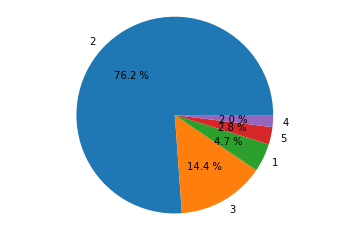

In [35]:
A = dfc2.Tópico.value_counts()
indices = A.index
plt.pie(A, labels=indices, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

#####  Validación asignación de Tópicos

In [36]:
for index,score in sorted(lda[diccionario.doc2bow(dfc2.loc[10,'Opinion'])], key=lambda tup: -1*tup[1]):
    print("Score:{}\t Topic:{}".format(score,lda.print_topic(index,5)))

Score:0.4383014738559723	 Topic:0.059*"pag" + 0.042*"factur" + 0.039*"pued" + 0.029*"hac" + 0.027*"plan"
Score:0.20960435271263123	 Topic:0.079*"app" + 0.054*"clar" + 0.047*"dat" + 0.042*"buen" + 0.038*"aplic"
Score:0.13473458588123322	 Topic:0.130*"servici" + 0.063*"internet" + 0.059*"mal" + 0.051*"señal" + 0.049*"mejor"
Score:0.13409456610679626	 Topic:0.111*"dej" + 0.083*"ver" + 0.077*"ingres" + 0.044*"inform" + 0.034*"hog"
Score:0.0832650363445282	 Topic:0.056*"llam" + 0.053*"graci" + 0.035*"ningun" + 0.030*"solucion" + 0.026*"encuentr"


In [37]:
bow_comentario = diccionario.doc2bow(dfc2.loc[10,'Opinion'])
distribucion_noticia = lda[bow_comentario]
dist_contrib = [topico[1] for topico in lda[bow_comentario]]
dist_contrib

[0.13473456, 0.43830147, 0.20960434, 0.08326503, 0.13409455]

####  fin validacion

###  zoom al topico_4  número 3

In [74]:
numeroTopicos=4
topicoZoom=2

In [75]:
## Quitar pag pactur
dfc2Zoom=dfc2.copy()
dfc2Zoom['contienePagFact']=dfc2Zoom['Opinion'].apply(lambda x: 1 if 'pag' in x else 0)
dfc2Zoom=dfc2Zoom[dfc2Zoom['contienePagFact']==0]
dfc2Zoom=dfc2Zoom[dfc2Zoom['Tópico']==topicoZoom]

In [76]:
# Repite el proceso de topicos

In [77]:
Lista_generalZoom=[]
for column in Qs:   
    if column in ('Q4','Q10','Q12','Q15','Q18','Q20') :
        listAux = dfc2Zoom["Tokens_"+column+"_T"].tolist()
        listAux = [x for x in listAux if x!= []]
        Lista_generalZoom = Lista_generalZoom+listAux

In [78]:
bigramZoom = gensim.models.Phrases(Lista_generalZoom, min_count=5, threshold=10) 
trigramZoom = gensim.models.Phrases(bigramZoom[Lista_generalZoom], threshold=10)
bigram_modZoom = gensim.models.phrases.Phraser(bigramZoom)
trigram_modZoom = gensim.models.phrases.Phraser(trigramZoom)
data_words_bigramsZoom = make_bigrams(Lista_generalZoom,bigram_modZoom)
diccionarioZoom = Dictionary(data_words_bigramsZoom)
diccionarioZoom.filter_extremes(no_below=2, no_above = 0.9)
corpusZoom = [diccionarioZoom.doc2bow(noticia) for noticia in data_words_bigramsZoom]

In [79]:
ldaZoom = LdaModel(corpus=corpusZoom, id2word=diccionarioZoom, 
               num_topics=numeroTopicos, random_state=35, 
               chunksize=1000, iterations=200, passes=40, alpha='auto')

In [80]:
lda_display = pyLDAvis.gensim_models.prepare(ldaZoom, corpusZoom, diccionarioZoom, sort_topics=False)
pyLDAvis.display(lda_display)

In [81]:
dfc2Zoom['TópicoZoom'] = ""
sumaTopicos = [0]*(numeroTopicos+1)
for i in dfc2Zoom.index:
    bow_comentario = diccionarioZoom.doc2bow(dfc2Zoom.loc[i,'Opinion'])
    distribucion_noticia = ldaZoom[bow_comentario]
    dist_contrib = [topico[1] for topico in ldaZoom[bow_comentario]]
    dfc2Zoom.loc[i,'TópicoZoom']=dist_contrib.index(max(dist_contrib))+1
    
    # sumar pertenencias a los tópicos
    for idx, val in enumerate(dist_contrib):
        sumaTopicos[idx+1]=sumaTopicos[idx+1]+dist_contrib[idx] 

In [82]:
dfc2Zoom.TópicoZoom.value_counts()

1    6713
2     226
4     191
3     168
Name: TópicoZoom, dtype: int64

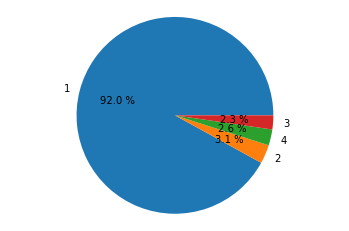

In [83]:
A = dfc2Zoom.TópicoZoom.value_counts()
indices = A.index
plt.pie(A, labels=indices, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

In [84]:
impresionTopicosLimp(ldaZoom,15,20)

1  pued app dej registr plan hac numer pud ingres factur ver clar buen equip cuent 
2  consult necesit opcion inform quier mejor ningun cancel actualiz facil sab encontr encuentr rap asesor 
3  servici internet mal funcion lent excelent sirv mir pesim moment nunc qued respond fall tod 
4  recarg graci llam sald realiz compr_paquet señal demor cobr solucion paquet carg ahor equip_financi vec 


In [49]:
#Guardar tabla de palabras

### Modelado de Topicos por Acción

In [50]:
len(dfc2)

11259

In [51]:
len(dfc)

28261

In [52]:
#dfc = dfSent[dfSent['Q2_NPS_GROUP']!='Promotor']
len(dfSent)

59096

In [53]:
len(dfSent[dfSent['Q2_NPS_GROUP']!='Promotor'])

28261

In [54]:
len(dfSent[dfSent['Q2_NPS_GROUP']!='Promotor'].fillna(''))

28261

In [55]:
numeroTopicos=4
topicoZoom=4

In [56]:
ZoomAccion=dfc2.copy()

In [57]:
ZoomAccion.columns

Index(['index', 'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q19', 'Q2_NPS_GROUP', 'Q2',
       'Q3', 'Q4', 'Q9', 'Q10', 'Q11', 'Q12', 'Q15', 'Q26_1', 'Q22_1', 'Q18',
       'Q24_1', 'Q20', 'Nombre del cliente App', 'ID cuenta o Telefono App',
       'email App', 'Segmento App', 'Modulo App', 'Accion',
       'Q_DataPolicyViolations', 'Q15 - Parent Topics',
       'Q15 - Sentiment Polarity', 'Q15 - Sentiment Score', 'Q15 - Sentiment',
       'Q15 - Topic Sentiment Label', 'Q15 - Topic Sentiment Score',
       'Q15 - Topics', 'Q20 - Parent Topics', 'Q20 - Sentiment Polarity',
       'Q20 - Sentiment Score', 'Q20 - Sentiment',
       'Q20 - Topic Sentiment Label', 'Q20 - Topic Sentiment Score',
       'Q20 - Topics', 'To

In [58]:
acciones=ZoomAccion.Accion.unique()

Pre_Elegidos


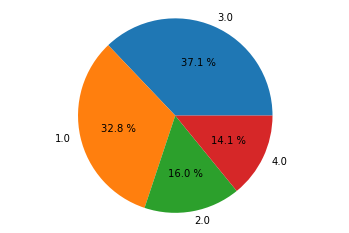

1  señal plan pag clar mal funcion dat llam mejor factur bien benefici si cuent deb pag_factur equip cobr cobertur sol 
2  servici internet graci sirv carg facil moment fall qued cae hog asesor atencion pas respuest nunc tiemp excelent sab app 
3  pued eleg dej famili_amig ingres numer registr hac buen pud amig pod cambi permit ver line dic realiz activ opcion 
4  app lent aplic inform ningun demor vec sal solucion actualiz intent much mas clar_hog ahor proces encuentr inscrib_numer equip_financi ser 
Pre_Consulta_Saldos


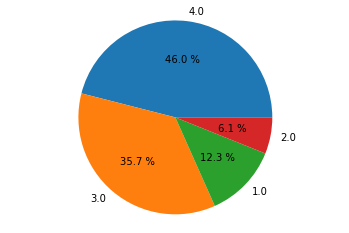

1  lent aplic bien funcion facil graci tiemp ocasion gust usuari pas promocion cos excelent celul falt naveg demor_carg client avec 
2  buen pud numer nunc cambi equip adquir demasi acced detall asi lleg revis posibl segu coloc product abre hac eleg 
3  app servici clar señal ingres internet mejor llam mal registr cuent siempr moment deb solucion line fall ningun telefon hog 
4  dat recarg sald paquet consum pag inform hac dej pued compr compr_paquet plan ver si dias consult carg sol aparec 
Pre_Detalle_Plan


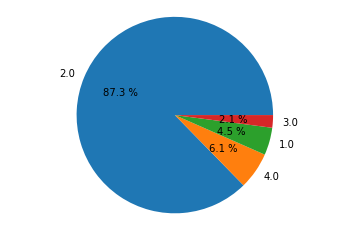

1  plan llam cancel line cambi sab encuentr equip facil ningun mejor asesor client nuev verific pas gust ayud contest ten 
2  pag factur dej pued app ver clar ingres cuent hac clar_hog consult necesit aplic dat aparec pod quier hog opcion 
3  pud funcion buen sirv lent busc nunc tecnic graci carg recarg cambi_numer qued bien trasl netflix tampoc falt abre canal 
4  servici internet mal encontr wifi solucion pesim señal telefon cambi_clav conect solicit respond fall da respuest atencion equip_financi tv esper 
Pre_Gestionar_Equipo


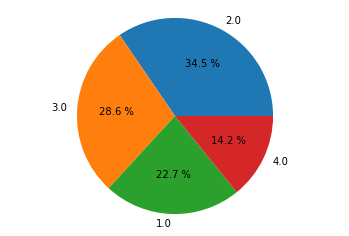

1  equip registr pud ningun imei nuev cambi celul dic registr_imei compr sal problem realiz respuest necesit permit solicit cup ahor 
2  app servici señal lent mal dat buen internet aplic funcion clar mejor pesim bien facil carg much demor sirv vec 
3  pag pued hac dej consult ingres si factur celul compr ver plan pag_factur pod quier equip_financi llam sald sab deb 
4  graci solucion inform line asesor rap fall opcion telefon report sol necesit chat busc actualiz pas contest da hog avec 
Pre_Paquetes-Recargas


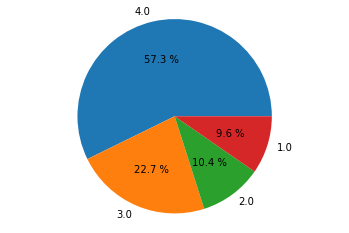

1  permit carg_factur sirv intent vec clar_hog app ingres deb compr_paquet lleg cuent codig bloque much pse siempr nunc actualiz rap 
2  pse clar pid banc movil conect pag transaccion internet inform error utiliz facil oper problem moment mes dic rechaz mism 
3  mal servici dic ningun pesim app señal activ dias paquet graci inclu pagin ingres sol nombr buen clar acept numer 
4  recarg hac pag compr_paquet dej pud realiz pued funcion app compr dat carg line celul sald lent aplic hog paquet 


In [59]:
modelosAccion={}
for accion in acciones:
    print(accion)
    Lista_generalZoom=[]
    ZoomAccionAux=ZoomAccion[ZoomAccion['Accion']==accion]
    for column in Qs:   
        if column in ('Q4','Q10','Q12','Q15','Q18','Q20') :
            listAux = ZoomAccionAux["Tokens_"+column+"_T"].tolist()
            listAux = [x for x in listAux if x!= []]
            Lista_generalZoom = Lista_generalZoom+listAux

    bigramZoom = gensim.models.Phrases(Lista_generalZoom, min_count=5, threshold=10) 
    trigramZoom = gensim.models.Phrases(bigramZoom[Lista_generalZoom], threshold=10)
    bigram_modZoom = gensim.models.phrases.Phraser(bigramZoom)
    trigram_modZoom = gensim.models.phrases.Phraser(trigramZoom)
    data_words_bigramsZoom = make_bigrams(Lista_generalZoom,bigram_modZoom)
    diccionarioZoom = Dictionary(data_words_bigramsZoom)
    diccionarioZoom.filter_extremes(no_below=2, no_above = 0.9)
    corpusZoom = [diccionarioZoom.doc2bow(noticia) for noticia in data_words_bigramsZoom]

    #ldaZoomAccion = LdaModel(corpus=corpusZoom, id2word=diccionarioZoom, 
    #               num_topics=numeroTopicos, random_state=35, 
    #               chunksize=1000, iterations=200, passes=40, alpha='auto')
    modelosAccion[accion]=LdaModel(corpus=corpusZoom, id2word=diccionarioZoom, num_topics=numeroTopicos, random_state=35, 
                   chunksize=1000, iterations=200, passes=40, alpha='auto')

    modelosAccion[accion+'dis']=pyLDAvis.gensim_models.prepare(modelosAccion[accion], corpusZoom, diccionarioZoom, sort_topics=False)
    
    ##dfc2Zoom['TópicoZoom'] = ""
    sumaTopicos = [0]*(numeroTopicos+1)
    for i in ZoomAccionAux.index:
        bow_comentario = diccionarioZoom.doc2bow(ZoomAccionAux.loc[i,'Opinion'])
        distribucion_noticia = modelosAccion[accion][bow_comentario]
        dist_contrib = [topico[1] for topico in modelosAccion[accion][bow_comentario]]
        ZoomAccionAux.loc[i,'TópicoZoomAccion']=dist_contrib.index(max(dist_contrib))+1

        # sumar pertenencias a los tópicos
        for idx, val in enumerate(dist_contrib):
            sumaTopicos[idx+1]=sumaTopicos[idx+1]+dist_contrib[idx] 

    ZoomAccionAux.TópicoZoomAccion.value_counts()
    A = ZoomAccionAux.TópicoZoomAccion.value_counts()
    indices = A.index
    plt.pie(A, labels=indices, autopct="%0.1f %%")
    plt.axis("equal")
    plt.show()

    impresionTopicosLimp(modelosAccion[accion],20,20)
    
    #acumular tabla resultados
    ZoomAccion['Top_Zoom_'+accion]=ZoomAccionAux['TópicoZoomAccion']

##  Información Modelos

In [60]:
pyLDAvis.display(modelosAccion['Pre_Detalle_Plandis'])

In [61]:
pyLDAvis.display(modelosAccion['Pre_Elegidosdis'])

In [62]:
pyLDAvis.display(modelosAccion['Pre_Consulta_Saldosdis'])

In [63]:
pyLDAvis.display(modelosAccion['Pre_Gestionar_Equipodis'])

In [64]:
pyLDAvis.display(modelosAccion['Pre_Paquetes-Recargasdis'])

######  fin Zoom

####  Construcción Tabla Final 

In [65]:
ZoomAccion

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Tokens_Q15_T,Tokens_Q18_T,Tokens_Q20_T,Opinion,Tópico,Top_Zoom_Pre_Elegidos,Top_Zoom_Pre_Consulta_Saldos,Top_Zoom_Pre_Detalle_Plan,Top_Zoom_Pre_Gestionar_Equipo,Top_Zoom_Pre_Paquetes-Recargas
3,4,2021-05-01 00:14:21,2021-05-01 00:15:37,IP Address,181.53.12.201,100,76,True,2021-05-01 00:15:38.223,R_udHanua3i8beZtT,...,[],[],[],[ningun],2,4.0,NaN,NaN,NaN,NaN
8,9,2021-05-01 00:56:56,2021-05-01 00:58:36,IP Address,191.156.52.30,100,100,True,2021-05-01 00:58:37.141,R_XjMcEuP3zshnpF7,...,[],[],"[parec, bien]","[qued, sald, carg, app, pod, recarg, vez, pare...",3,NaN,4.0,NaN,NaN,NaN
9,10,2021-05-01 01:11:12,2021-05-01 01:13:28,IP Address,190.26.155.7,100,136,True,2021-05-01 01:13:29.173,R_x5YL4kva6EbeuWJ,...,"[mal, señal]",[],[],"[mal, señal]",2,NaN,NaN,2.0,NaN,NaN
10,11,2021-05-01 01:15:49,2021-05-01 01:21:26,IP Address,186.29.191.43,100,336,True,2021-05-01 01:21:26.392,R_3ltBuR7i97QbFAM,...,"[cambi, mes, oper, regres, nuev, sub, mil, pes...",[],[],"[bastant, tiemp, usted, sub, plan, line, cambi...",2,3.0,NaN,NaN,NaN,NaN
12,13,2021-05-01 01:31:59,2021-05-01 01:35:12,IP Address,191.156.2.216,100,193,True,2021-05-01 01:35:12.335,R_1laRSYqAGwFA04C,...,"[demor, carg, despues, dic, sient, trabaj, ser...",[],[],"[demor, carg, despues, dic, sient, trabaj, ser...",1,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59083,14596,2021-08-31 23:14:27,2021-08-31 23:16:32,0,191.95.48.252,100,124,1,2021-08-31 23:16:32.361,R_21vzaanZGL0D3bl,...,"[poc, opcion]",[],[],"[much, poc, opcion]",2,NaN,NaN,NaN,NaN,4.0
59091,14604,2021-08-31 23:35:04,2021-08-31 23:38:05,0,181.53.13.231,100,180,1,2021-08-31 23:38:05.624,R_1OSGRtz2YrBAu8w,...,[],[],[],"[ten, paquet, econom, mensual, buen, gig]",3,NaN,4.0,NaN,NaN,NaN
59092,14605,2021-08-31 23:36:56,2021-08-31 23:41:48,0,181.51.33.29,100,291,1,2021-08-31 23:41:48.312,R_vPmzxQRYLqoFNkt,...,"[dej, agreg, contact, famili, amig]","[agreg, contact, grup, famili]",[],"[dej, agreg, numer, grup, famil, dej, agreg, c...",5,3.0,NaN,NaN,NaN,NaN
59093,14606,2021-08-30 23:45:59,2021-08-30 23:46:46,0,181.142.161.28,41,47,0,2021-08-31 23:46:48.554,R_3FKiKz66K1XYuT3,...,[],"[compr, plan, postpag]",[],"[compr, plan, postpag]",2,NaN,NaN,2.0,NaN,NaN


In [66]:
len(df)

59096

In [67]:
len(dfSent)

59096

In [68]:
len(dfc2)

11259

In [69]:
len(dfc2Zoom)

214

In [70]:
TablaFinal=df.copy()
for column in Qs:    
    TablaFinal["Sent_"+column]=dfSent["Sent_"+column] 
TablaFinal['Opinion']=dfc2['Opinion']
TablaFinal['Topico']=dfc2['Tópico']
TablaFinal['TópicoZoom']=dfc2Zoom['TópicoZoom']

In [71]:
###  Agregar Información
for accion in acciones:
    TablaFinal['TópicoAccion_'+accion]=ZoomAccion['Top_Zoom_'+accion]

In [72]:
TablaFinal[TablaFinal['Accion']=="Pre_Detalle_Plan"]

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Sent_Q18,Sent_Q20,Opinion,Topico,TópicoZoom,TópicoAccion_Pre_Elegidos,TópicoAccion_Pre_Consulta_Saldos,TópicoAccion_Pre_Detalle_Plan,TópicoAccion_Pre_Gestionar_Equipo,TópicoAccion_Pre_Paquetes-Recargas
6,7,2021-05-01 00:32:28,2021-05-01 00:35:33,IP Address,181.244.74.127,100,184,True,2021-05-01 00:35:33.715000,R_WlDgkDboPHperPH,...,,0.9998136624179559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2021-05-01 01:11:12,2021-05-01 01:13:28,IP Address,190.26.155.7,100,136,True,2021-05-01 01:13:29.173000,R_x5YL4kva6EbeuWJ,...,,,"[mal, señal]",2,NaN,NaN,NaN,2.0,NaN,NaN
16,17,2021-05-01 03:33:27,2021-05-01 03:34:56,IP Address,181.142.137.9,100,88,True,2021-05-01 03:34:56.361000,R_ZmK0qDDpfWbHJi9,...,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,22,2021-05-01 05:21:28,2021-05-01 05:32:42,IP Address,186.87.152.172,100,673,True,2021-05-01 05:32:42.286000,R_ANKhuvqrAAMerip,...,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,23,2021-04-30 05:39:37,2021-04-30 05:39:58,IP Address,181.58.39.39,6,21,False,2021-05-01 05:40:00.089000,R_2Y2HJRaQo1gqBFg,...,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59065,14578,2021-08-31 22:24:48,2021-08-31 22:25:49,0,190.90.9.121,100,60,1,2021-08-31 22:25:49.577000,R_2E6NWpqZIi3hfaz,...,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59070,14583,2021-08-31 22:42:41,2021-08-31 22:45:27,0,191.156.156.197,100,165,1,2021-08-31 22:45:27.330000,R_vczS9RyQafytENr,...,-0.6916568725552124,,"[pod, encontr, cambi, numer, q, sal, aplic, ca...",2,NaN,NaN,NaN,2.0,NaN,NaN
59076,14589,2021-08-30 22:55:51,2021-08-30 22:58:05,0,181.60.16.81,41,133,0,2021-08-31 22:58:06.873000,R_2aXCJApAQi3rved,...,0.03347498436245333,,"[administr, wifi]",2,NaN,NaN,NaN,2.0,NaN,NaN
59093,14606,2021-08-30 23:45:59,2021-08-30 23:46:46,0,181.142.161.28,41,47,0,2021-08-31 23:46:48.554000,R_3FKiKz66K1XYuT3,...,-0.14107212091566557,,"[compr, plan, postpag]",2,NaN,NaN,NaN,2.0,NaN,NaN


In [73]:
TablaFinal.to_csv('TablaFinalMay_Ago.csv',index=False, sep=';', encoding="utf-8-sig")